<a href="https://colab.research.google.com/github/Garciashk/proyecto_caso_de_negocio/blob/main/Notebook/Churn_clasifiacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  <td>
    <a target="_blank" href="https://github.com/Garciashk/proyecto_caso_de_negocio"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /></a>
  </td>
  
</table>


# <img style="float: center; padding-right: 10px;" src="https://www.pikpng.com/pngl/b/467-4670553_universidad-javeriana-esslingen-am-neckar-clipart.png" width="100" height="150">



<h1> <strong>Métodos de Analítica II.</strong></h1> 
<h2> Para: Juan Coba Puerto.</br></h2>
<h2>Integrantes:</br></h2>
<h2>Andrea López Gualtero.</br></h2>
<h2>Juan Sebastián Quiroga Bernal.</br></h2>
<h2>Leonardo H. García Díaz</h2>

**Este colab puede ser ejecutado por cualquier usuario sin necesidad de cargar los archivos al entorno, debido a que la conexión está configurada para acceder a los archivos desde la nube**.

<img style="display: block;-webkit-user-select: none;margin: auto;background-color: hsl(0, 0%, 90%);transition: background-color 300ms;" src="https://www.tractionwise.com/wp-content/uploads/2021/01/Articles-Churn-Rate_Eng.png">

<h1> <strong> Proyecto Caso de Negocio:</strong>Predicción de churn en un Banco</h1> </br> </br> <h2>Durante el último trimestre, una institución financiera experimentó una disminución del 15% en su base de clientes activos, tras descubrir que muchos de ellos estaban migrando a otras entidades financieras a través de información externa de Datacrédito. En respuesta a esta situación, la institución decidió implementar un programa de beneficios que incluye la eliminación de cuotas de manejo, mejores tasas de interés en productos de crédito de consumo y retiros ilimitados en cajeros automáticos. Para maximizar el impacto de estos beneficios, el equipo de Análisis de Clientes necesita identificar a los clientes con mayor probabilidad de retirarse del banco y priorizar sus ofertas. El objetivo final del equipo es construir un modelo predictivo que ayude a predecir qué clientes pueden abandonar el banco y tomar medidas preventivas para retenerlos.</h2></br></br>
<h2><ol>clientnum : Identificador único del cliente.</ol>
<ol>attrition_flag : (Variable Objetivo) Indica si el cliente se fue a otro banco o no.</ol>
<ol>customer_age : Edad del cliente.</ol>
<ol>gender : Sexo del cliente.</ol>
<ol>dependent_count : Número de personas económicamente dependientes del cliente.</ol>
<ol>education_level : Nivel de Educación del Cliente.</ol>
<ol>marital_status : Estado Civil del Cliente.</ol>
<ol>income_category : Categoría de Ingresos del Cliente.</ol>
<ol>card_category : Categoría de tarjeta del cliente.</ol>
<ol>months_on_book : Antigüedad del cliente.</ol>
<ol>total_relationship_count : Total de productos que tiene el cliente con el banco.</ol>
<ol>months_inactive_12_mon : Número de meses en que el cliente estuvo inactivo en el último año.</ol>
<ol>contacts_count_12_mon : Número de contactos con el cliente en el último año.</ol>
<ol>credit_limit : Cupo de crédito del cliente.</ol>
<ol>total_revolving_bal : Balance de crédito rotativo del cliente.</ol>
<ol>avg_open_to_buy : Promedio de cupo disponible en tarjetas de crédito</ol>
<ol>total_amt_chng_q4_q1 : Cambio en el valor total de transacciones entre Q4 y Q1.</ol>
<ol>total_trans_amt : Valor total de transacciones</ol>
<ol>total_trans_ct : Cantidad de transacciones.</ol>
<ol>total_ct_chng_q4_q1 : Cambio en la cantidad total de transacciones entre Q4 y Q1.</ol>
<ol>avg_utilization_ratio : Razón de utilización de la tarjeta.</ol></h2>

<h2>La variable que se busca predecir en el presente notebook es attrition_flag, la cual determina si un cliente se cambio de banco o no. (Binaria).</h2>

El dataframe cuenta con un total de 21 variables (columnas) distintas, al validar si la variable objetivo attrition_flag, se identifica que esta desbalanceado, por lo que al momento de modelar se debe tener presente este aspecto.

# 1. Importar librerias y base de datos.

Se importarán las librerias necesarias para poder usar en el notebook.

In [1]:
# importar librerias a ser usadas.
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_palette(sns.color_palette("Paired"))

In [2]:
#Cargar base de datos que fue previamente cargada en Google Drive. 
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

bank_churn = '1OZZSqMYtniRlgENtq3lT3DOJQrzcw50Q' 


download = drive.CreateFile({'id': bank_churn}) 
download.GetContentFile('bank_churn.csv')

df = pd.read_csv(r'bank_churn.csv',sep=',')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clientnum                 10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

clientnum     attrition_flag  customer_age gender  dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  education_level marital_status income_category card_category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   months_on_book  ...  months_inactive_12_mon  contacts_count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   credit_limit  total_revolving_bal  avg_open_to_buy  total_amt_chng_q4_q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   total_trans_amt  total_trans_ct  total_ct_chng_q4_q1  avg_utilization_ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [3]:
#validación de distribución de la variable de respuesta.
df.attrition_flag.value_counts(normalize=True)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: attrition_flag, dtype: float64

# 2. Exploración de datos.

Con el fin de poder identificar relacion entre las 19 variables independientes y la variable de respuesta, con el fin de captar algun patrón que sea preponderante para la separación entre clientes que migrarón a otro banco y los que no.



In [4]:
#Se evidencia que no hay nulos

N, M = df.shape
print("Cantidad de clientes unicos: {}\nNumero de variables: {}".format(N, M))
print('--------------------------------')
print('Cantidad de valores faltantes por variable')
df.isna().sum() 

Cantidad de clientes unicos: 10127
Numero de variables: 21
--------------------------------
Cantidad de valores faltantes por variable


clientnum                   0
attrition_flag              0
customer_age                0
gender                      0
dependent_count             0
education_level             0
marital_status              0
income_category             0
card_category               0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
contacts_count_12_mon       0
credit_limit                0
total_revolving_bal         0
avg_open_to_buy             0
total_amt_chng_q4_q1        0
total_trans_amt             0
total_trans_ct              0
total_ct_chng_q4_q1         0
avg_utilization_ratio       0
dtype: int64

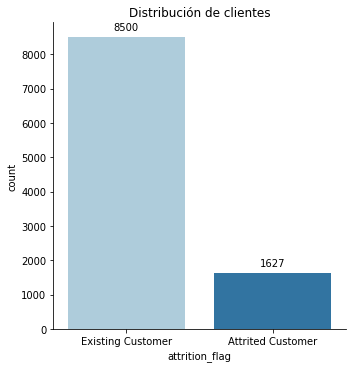

In [5]:
import seaborn as sns

# create the catplot
catplot = sns.catplot(data=df, x='attrition_flag', kind="count")

# set the title
catplot.set(title='Distribución de clientes')

# annotate the count values on top of the bars
for ax in catplot.axes.flat:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')

# show the plot
catplot.fig.show()

gender                    F         M
attrition_flag                       
Attrited Customer  0.173572  0.146152
Existing Customer  0.826428  0.853848

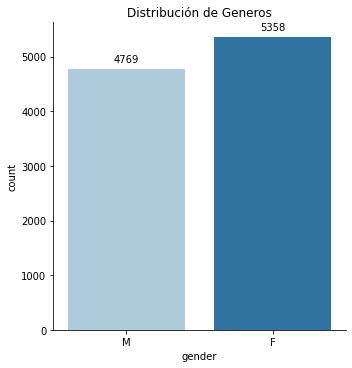

In [28]:
import seaborn as sns

# create the catplot
catplot = sns.catplot(x='gender', data=df, kind="count")

# set the title
catplot.set(title='Distribución de Generos')

# annotate the count values on top of the bars
for ax in catplot.axes.flat:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')

# show the plot
catplot.fig.show()
pd.crosstab(df['attrition_flag'], [df['gender']], normalize='columns')

Se observa que el mayor grupo poblacional proponderante es el femenino, y que al valdiar la relación referente a los clientes que cambiaron de Banco conservan mayor relación.

In [8]:
# Distribución por nivel educativo.
df['education_level'].value_counts(normalize=True)*100

Graduate         30.887726
High School      19.877555
Unknown          14.999506
Uneducated       14.683519
College          10.002962
Post-Graduate     5.095290
Doctorate         4.453441
Name: education_level, dtype: float64

In [9]:
pd.crosstab(df['attrition_flag'], [df['education_level']], normalize='columns', margins=True)


education_level     College  Doctorate  Graduate  High School  Post-Graduate  \
attrition_flag                                                                 
Attrited Customer  0.152024   0.210643  0.155691     0.152012       0.178295   
Existing Customer  0.847976   0.789357  0.844309     0.847988       0.821705   

education_level    Uneducated   Unknown      All  
attrition_flag                                    
Attrited Customer    0.159381  0.168532  0.16066  
Existing Customer    0.840619  0.831468  0.83934

In [10]:
pd.crosstab(df['gender'], [df['education_level']], normalize='columns', margins=True)


education_level   College  Doctorate  Graduate  High School  Post-Graduate  \
gender                                                                       
F                0.525173   0.569845  0.533887     0.510681        0.50969   
M                0.474827   0.430155  0.466113     0.489319        0.49031   

education_level  Uneducated   Unknown       All  
gender                                           
F                  0.535306  0.534562  0.529081  
M                  0.464694  0.465438  0.470919


Se observa que Post-graduate y Doctorate tiene 5%, y 4% respectivamente, y conservan una proporcion similar referente a la variable de respuesta (siendo los que en mayor proporcion salen) por lo que con el fin de remover tanta variación sumando un total de 9%, dicho grupo sera de interes para nuestro analisis por su mayor proporción.

Es interesante que en el segmento educativo de clientes con Doctorado la proporicon de mujers supera el 52% del grupo en general.

In [11]:
df['education_level']= np.where(df['education_level'] == 'Doctorate', 'Post-Graduate', df['education_level'])
df['education_level'].value_counts(normalize=True)*100

Graduate         30.887726
High School      19.877555
Unknown          14.999506
Uneducated       14.683519
College          10.002962
Post-Graduate     9.548731
Name: education_level, dtype: float64

Debido a la gran cantidad de variables, se realizara un pair plot, diferenciados por el genero, para identificar mejor que variables podrian servir como predictoras debido a su poder de separación.

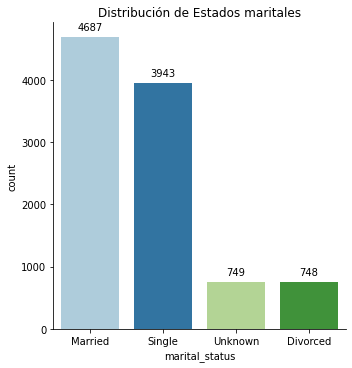

In [12]:
import seaborn as sns

# create the catplot
catplot = sns.catplot(x='marital_status', data=df, kind="count")

# set the title
catplot.set(title='Distribución de Estados maritales')

# annotate the count values on top of the bars
for ax in catplot.axes.flat:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')

# show the plot
catplot.fig.show()

pd.crosstab(df['attrition_flag'], [df['marital_status']], normalize='columns', margins=True)


Se mantiene una proporción muy similar en todos los estatus maritales, por lo que posiblemente no sea muy optima para separar nuestra variables de respuesta, con junto con la distribución de ingresos.

income_category     $120K +  $40K - $60K  $60K - $80K  $80K - $120K  \
attrition_flag                                                        
Attrited Customer  0.173315     0.151397     0.134807      0.157655   
Existing Customer  0.826685     0.848603     0.865193      0.842345   

income_category    Less than $40K   Unknown      All  
attrition_flag                                        
Attrited Customer        0.171862  0.168165  0.16066  
Existing Customer        0.828138  0.831835  0.83934

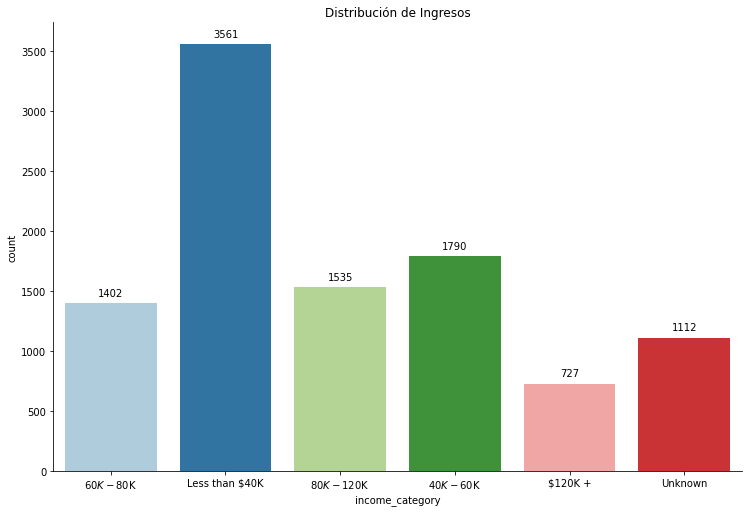

In [14]:
import seaborn as sns

# create the catplot
catplot = sns.catplot(x='income_category', data=df, kind="count", height=7, aspect=1.5)

# set the title
catplot.set(title='Distribución de Ingresos')

# annotate the count values on top of the bars
for ax in catplot.axes.flat:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')

# show the plot
catplot.fig.show()

pd.crosstab(df['attrition_flag'], [df['income_category']], normalize='columns', margins=True)

card_category          Blue      Gold  Platinum    Silver      All
attrition_flag                                                    
Attrited Customer  0.160979  0.181034      0.25  0.147748  0.16066
Existing Customer  0.839021  0.818966      0.75  0.852252  0.83934

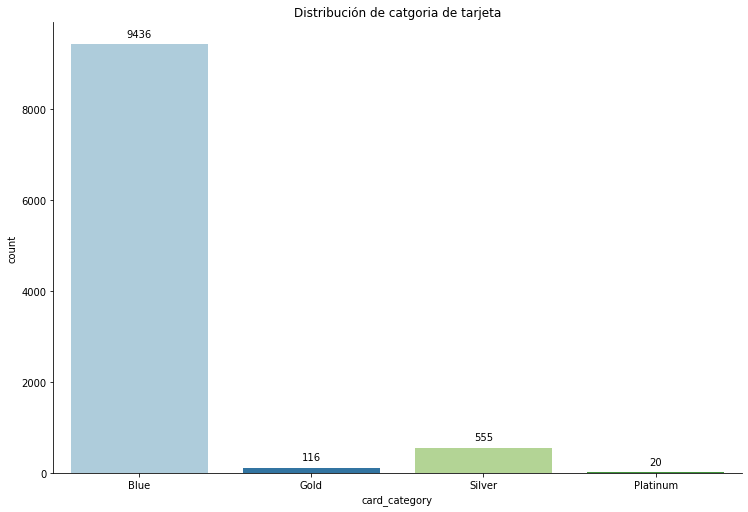

In [29]:
import seaborn as sns

# create the catplot
catplot = sns.catplot(x='card_category', data=df, kind="count", height=7, aspect=1.5)

# set the title
catplot.set(title='Distribución de catgoria de tarjeta')

# annotate the count values on top of the bars
for ax in catplot.axes.flat:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')


# show the plot
catplot.fig.show()

pd.crosstab(df['attrition_flag'], [df['card_category']], normalize='columns', margins=True)


Este banco, tiene una baja taza de clientes Gold o Platinum, por lo que se puede inferir que es un banco no exclusivo por lo que esta podria ser un motivo de migración de clientes, ya que las proporciones mayores estan en estos grupos previamente.

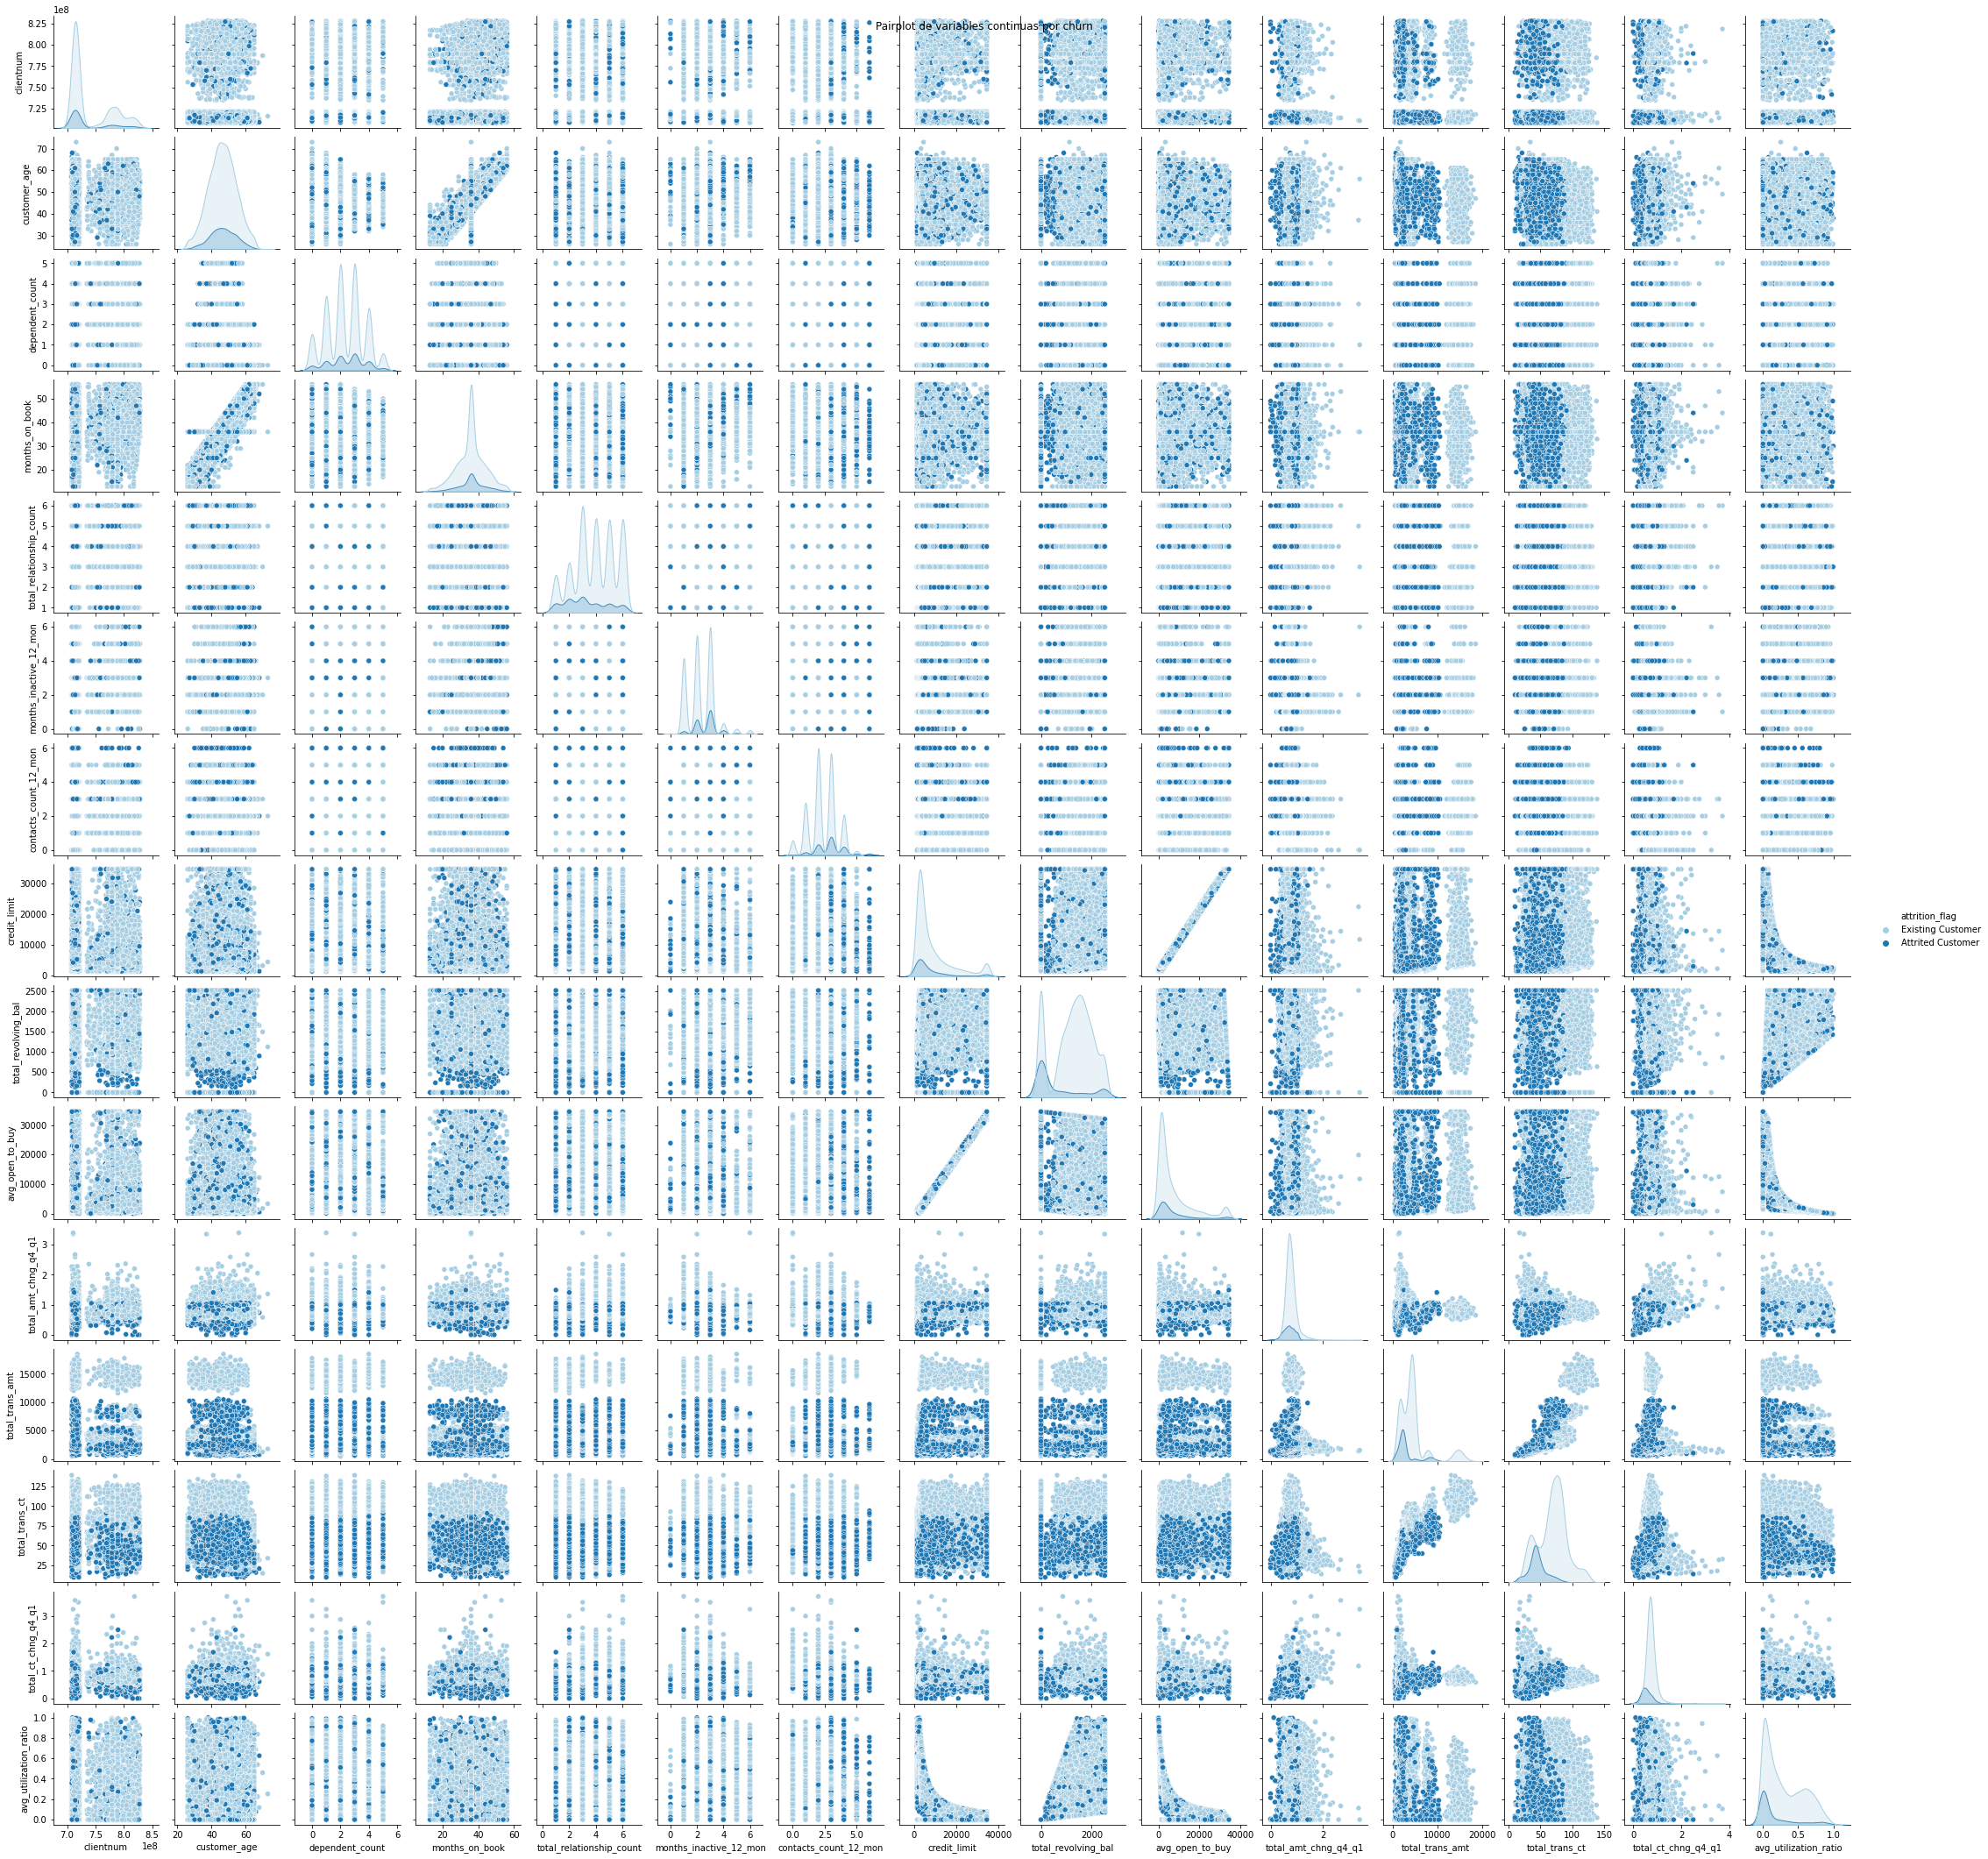

In [15]:
import seaborn as sns

# create the pairplot
pairplot = sns.pairplot(data=df, hue='attrition_flag',  height=2)

# set the title
pairplot.fig.suptitle('Pairplot de variables continuas por churn')

# show the plot
pairplot.fig.show()


Se identifica que la cantidad de transacciones puede ser un factor importante para clasificar ya que se puede inferir que aproximandamente bajo las 90 transacciones, principalmente las variables que expresan este comportamiento se identifica como habilidad predicitiva. 

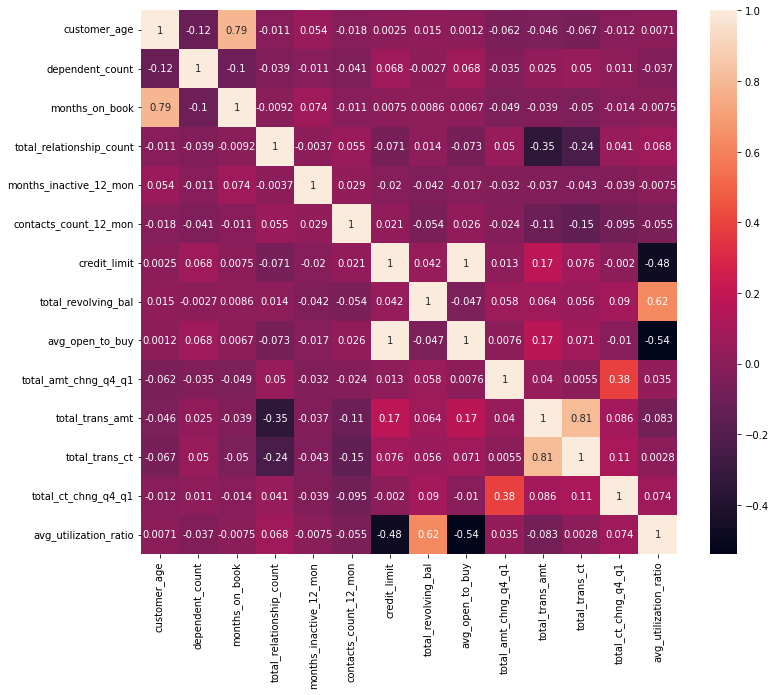

In [20]:
#Matriz de correlaciones
df.drop(['clientnum'], axis=1,inplace = True)
corr_df=df.corr() 
plt.figure(figsize=(12, 10))
sns.heatmap(corr_df, annot=True)
plt.show()


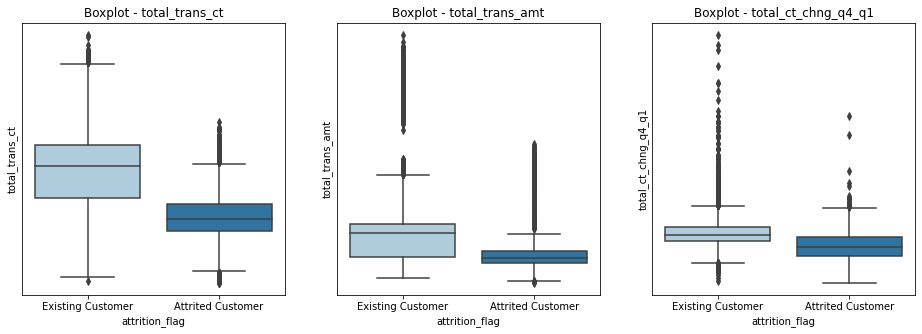

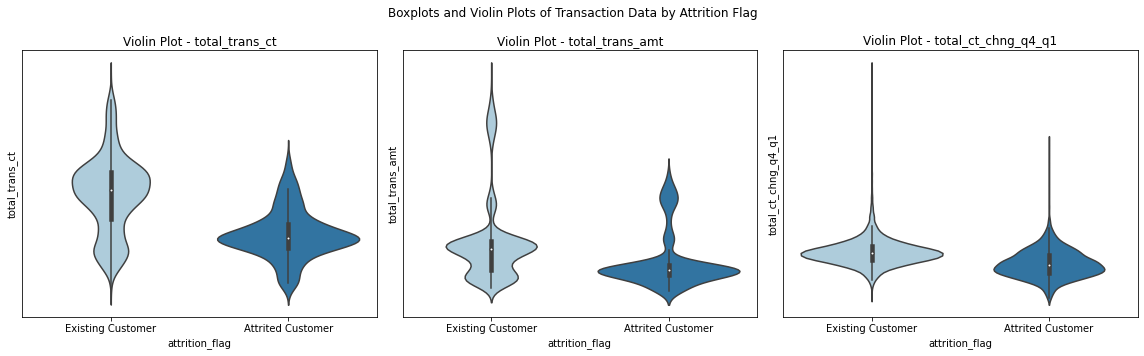

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the subplots for the boxplots
fig, axes_box = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

# Create a list of tuples with the plot title, data column, and subplot position for the boxplots
plots_box = [('Boxplot - total_trans_ct', 'total_trans_ct', 0),
             ('Boxplot - total_trans_amt', 'total_trans_amt', 1),
             ('Boxplot - total_ct_chng_q4_q1', 'total_ct_chng_q4_q1', 2)]

# Loop through the boxplot plots and add them to the subplots
for plot in plots_box:
    title, col, pos = plot
    ax = axes_box[pos]
    sns.boxplot(data=df, x='attrition_flag', y=col, ax=ax)
    ax.set_title(title)
    ax.set_ylabel(col)
    ax.set_yticks([])
    
# Set up the subplots for the violin plots
fig, axes_violin = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

# Create a list of tuples with the plot title, data column, and subplot position for the violin plots
plots_violin = [('Violin Plot - total_trans_ct', 'total_trans_ct', 0),
                ('Violin Plot - total_trans_amt', 'total_trans_amt', 1),
                ('Violin Plot - total_ct_chng_q4_q1', 'total_ct_chng_q4_q1', 2)]

# Loop through the violin plots and add them to the subplots
for plot in plots_violin:
    title, col, pos = plot
    ax = axes_violin[pos]
    sns.violinplot(data=df, x='attrition_flag', y=col, ax=ax)
    ax.set_title(title)
    ax.set_ylabel(col)
    ax.set_yticks([])
    
# Add a main title to the figure
fig.suptitle('Boxplots and Violin Plots of Transaction Data by Attrition Flag')

# Adjust the spacing between subplots and show the figure
plt.tight_layout()
plt.show()


La misma inferencia que se persive en el pair plot, las transaciones tienen un comportamiento distinto entre los dos grupos de nuestro analsis, se tiene que validar a profundidad para evitar ser redundates y agregar mas dimenciones sin necesidad.

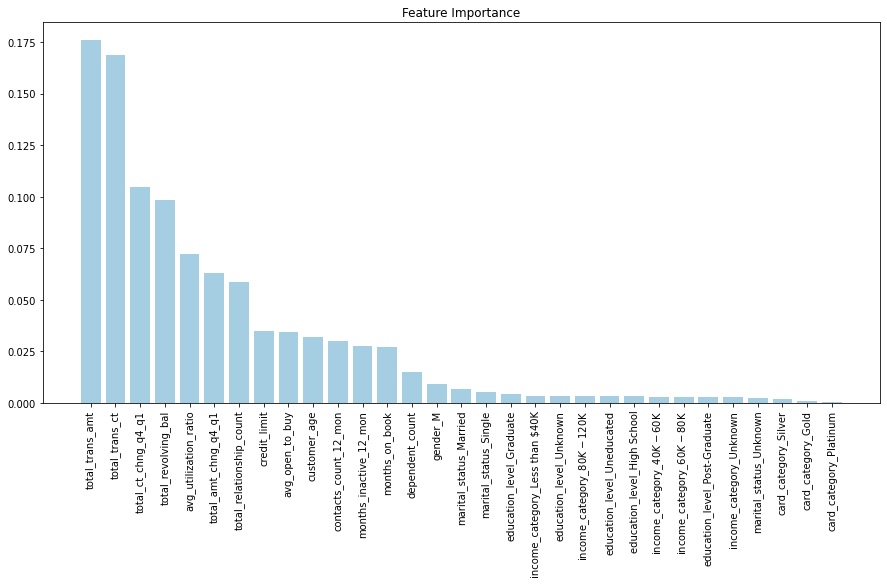

1. total_trans_amt: 0.176
2. total_trans_ct: 0.169
3. total_ct_chng_q4_q1: 0.105
4. total_revolving_bal: 0.098
5. avg_utilization_ratio: 0.072
6. total_amt_chng_q4_q1: 0.063
7. total_relationship_count: 0.058
8. credit_limit: 0.035
9. avg_open_to_buy: 0.034
10. customer_age: 0.032
11. contacts_count_12_mon: 0.030
12. months_inactive_12_mon: 0.027
13. months_on_book: 0.027
14. dependent_count: 0.015
15. gender_M: 0.009
16. marital_status_Married: 0.007
17. marital_status_Single: 0.005
18. education_level_Graduate: 0.004
19. income_category_Less than $40K: 0.003
20. education_level_Unknown: 0.003
21. income_category_$80K - $120K: 0.003
22. education_level_Uneducated: 0.003
23. education_level_High School: 0.003
24. income_category_$40K - $60K: 0.003
25. income_category_$60K - $80K: 0.003
26. education_level_Post-Graduate: 0.003
27. income_category_Unknown: 0.003
28. marital_status_Unknown: 0.002
29. card_category_Silver: 0.002
30. card_category_Gold: 0.001
31. card_category_Platinum: 0.0

In [47]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier


X = df.drop('attrition_flag', axis=1)
y = df.attrition_flag
X = pd.get_dummies(X, drop_first=True)


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
sorted_indices = importances.argsort()[::-1]


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# load data
X = df.drop('attrition_flag', axis=1)
y = df.attrition_flag

# one-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# train random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# calculate feature importances and sort them
importances = rf.feature_importances_
sorted_indices = importances.argsort()[::-1]

# plot feature importances
plt.figure(figsize=(15, 7))
plt.title("Feature Importance")
plt.bar(range(len(importances)), importances[sorted_indices])
plt.xticks(range(len(importances)), X.columns[sorted_indices], rotation=90)
plt.show()


for i, index in enumerate(sorted_indices):
    print(f"{i+1}. {X.columns[index]}: {importances[index]:.3f}")


# 3. Transformación de datos para modelamiento

<Axes: xlabel='attrition_flag', ylabel='credit_limit'>

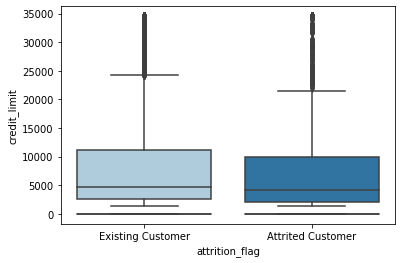

In [24]:

sns.boxplot(data=df_1, x='attrition_flag', y='total_relationship_count')
sns.boxplot(data=df_1, x='attrition_flag', y='credit_limit')

<Axes: xlabel='attrition_flag', ylabel='total_trans_ct'>

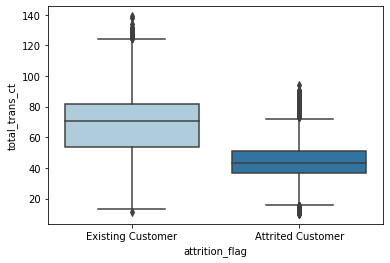

In [25]:
sns.boxplot(data=df_1, x='attrition_flag', y='total_trans_ct')

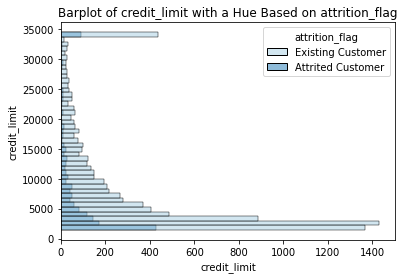

In [26]:
# Create the histogram
sns.histplot(data=df, y='credit_limit', hue='attrition_flag')

# Add a title and x-axis label
plt.title('Barplot of credit_limit with a Hue Based on attrition_flag')
plt.xlabel('credit_limit')

# Show the plot
plt.show()

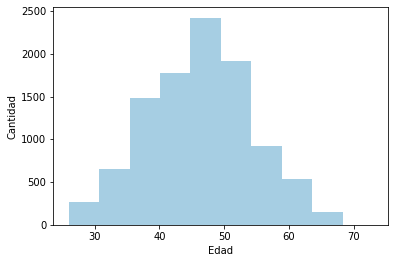

In [27]:
data = df_1.customer_age
(counts, bins, patches) = plt.hist(data)
plt.xlabel("Edad")
plt.ylabel("Cantidad")
plt.show()

In [19]:
#Se convierten a factor
df.attrition_flag.astype('category')
df.gender.astype('category')
df.education_level.astype('category')
df.marital_status.astype('category')
df.income_category.astype('category')
df.card_category.astype('category')

0          Blue
1          Blue
2          Blue
3          Blue
4          Blue
          ...  
10122      Blue
10123      Blue
10124      Blue
10125      Blue
10126    Silver
Name: card_category, Length: 10127, dtype: category
Categories (4, object): ['Blue', 'Gold', 'Platinum', 'Silver']